In [121]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

image = cv2.imread('diagram3.png')
shape = image.shape
print('This image is:', type(image), 
      ' with dimensions:',shape)
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray",image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

This image is: <class 'numpy.ndarray'>  with dimensions: (424, 850, 3)


## Define the color threshold

In [157]:
#lower_blue = np.array([0,0,230])  
#upper_blue = np.array([250,250,255])
threshold = 30
lower = np.array([255-threshold])  
upper = np.array([255])

## Create a mask

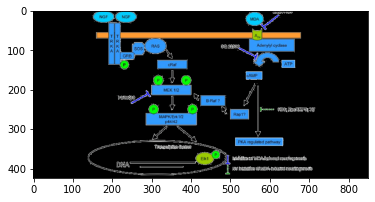

In [195]:
#mask = cv2.inRange(image_copy, lower, upper)
mask =cv2.threshold(image_copy, 250, 255, cv2.THRESH_BINARY)[1]
plt.imshow(mask, cmap='gray')
masked_image = np.copy(image)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

## apply morphological transformations
#### removes random white noise

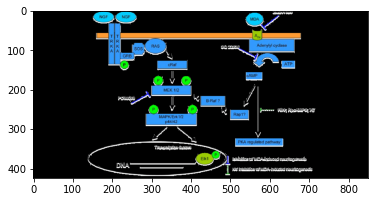

In [196]:
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, (7,7))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, (7,7))
plt.imshow(mask,cmap='gray')
masked_image = np.copy(image)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

## erosion


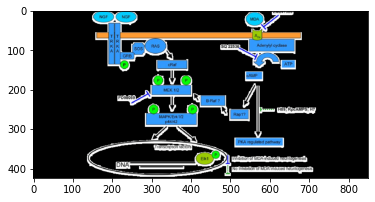

In [197]:
kernel = np.ones((5,5),np.uint8)
mask = cv2.erode(mask,kernel,iterations = 1)
masked_image = np.copy(image)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)


## dilation

In [198]:
# kernel = np.ones((3,3),np.uint8)
# mask = cv2.dilate(mask,kernel,iterations = 1)
# masked_image = np.copy(image)
# masked_image[mask != 0] = [0, 0, 0]
# plt.imshow(masked_image)

## anti aliasing the mask

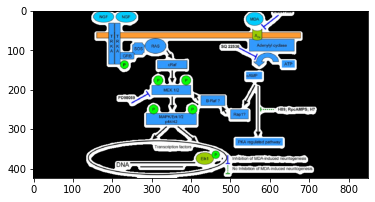

In [210]:
mask = cv2.GaussianBlur(mask, (7,7), sigmaX=4, sigmaY=4, borderType = cv2.BORDER_DEFAULT)
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)
masked_image = np.copy(image)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

## Mask and add a blurred background image

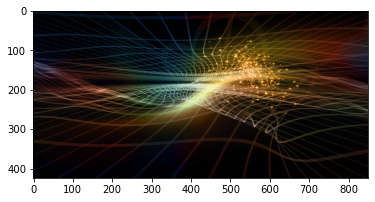

In [211]:
background_image = cv2.imread('2.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
#resize to diagram's shape
background_image = cv2.resize(background_image, (shape[1],shape[0]), interpolation = cv2.INTER_AREA)
crop_background = background_image[0:shape[0], 0:shape[1]] #crop if needed
plt.imshow(crop_background)

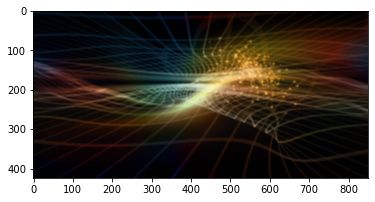

In [212]:
#add blur
blur_amount = 5
crop_background = cv2.blur(crop_background, (blur_amount,blur_amount),0) 
plt.imshow(crop_background)

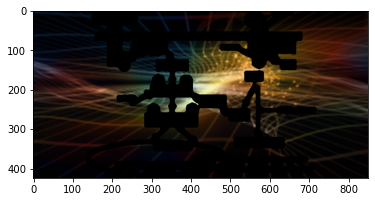

In [213]:
crop_background[mask == 0] = [0,0,0]
plt.imshow(crop_background)

## combine the pizza with black bg and space bg with black pizza

In [214]:
complete_image = masked_image + crop_background
cv2.imshow("final",complete_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('./diagram_changedBG.jpg', complete_image)

True